In [1]:
import numpy as np

import pandas as pd

import urllib.request
import os

from IPython.display import Image 

import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings("ignore")

### Задание

Проанализировать мультимодальный датасет

Описать принцип связки мультимодальных данных

Провести предобработку данных

Сделать EDA

Проанализировать возможное применение этих данных

### Решение

Возьмем мультимодальный датасет (изображения и текст)

Wikipedia-based Image Text (WIT) Dataset

In [2]:
data = pd.read_table('wit_v1.train.all-1percent_sample.tsv')

In [3]:
data.head(5)

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
0,es,https://es.wikipedia.org/wiki/Hoz_y_martillo,https://upload.wikimedia.org/wikipedia/commons...,Hoz y martillo,Emblemas,Hoz y martillo / Galería / Emblemas,NaN,Galego: Logo do Movemento Galego ao Socialismo,NaN,image/jpeg,107,272,False,False,True,La hoz y el martillo es un símbolo que represe...,NaN
1,de,https://de.wikipedia.org/wiki/Kleines_Hasenmaul,https://upload.wikimedia.org/wikipedia/commons...,Kleines Hasenmaul,NaN,Kleines Hasenmaul,NaN,English: Lesser bulldog bat (Noctilio albivent...,NaN,image/jpeg,1636,2000,True,False,False,Das Kleine Hasenmaul ist eine Fledermausart au...,Das Kleine Hasenmaul (Noctilio albiventris) is...
2,ru,https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%...,https://upload.wikimedia.org/wikipedia/commons...,Украинская гривна,Изъятые из обращения монеты,Украинская гривна / Монеты / Изъятые из обраще...,NaN,English: Coin of Ukraine Русский: Юбилейная мо...,NaN,image/jpeg,193,200,False,True,True,"Гри́вна — национальная валюта Украины, названн...",С 1 июля 2018 года прекращён дополнительный вы...
3,ru,https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%...,http://upload.wikimedia.org/wikipedia/commons/...,Менделеево (Московская область),NaN,Менделеево (Московская область),NaN,English: mendeleevo,NaN,image/jpeg,1877,2756,True,True,False,Менделе́ево — посёлок городского типа Московск...,Менделе́ево — посёлок городского типа Московск...
4,sw,"https://sw.wikipedia.org/wiki/Brookline,_Massa...",https://upload.wikimedia.org/wikipedia/commons...,"Brookline, Massachusetts",NaN,"Brookline, Massachusetts","Sehemu za Mji wa Brookline, Massachusetts",English: Brookline MA August 2015 Photo Collage 2,NaN,image/jpeg,1936,1936,False,False,True,Brookline ni mji wa Marekani katika jimbo la M...,Brookline ni mji wa Marekani katika jimbo la M...


In [4]:
data.dtypes

language                           object
page_url                           object
image_url                          object
page_title                         object
section_title                      object
hierarchical_section_title         object
caption_reference_description      object
caption_attribution_description    object
caption_alt_text_description       object
mime_type                          object
original_height                     int64
original_width                      int64
is_main_image                        bool
attribution_passes_lang_id           bool
page_changed_recently                bool
context_page_description           object
context_section_description        object
dtype: object

Each row of the WIT dataset consists of 17 columns and they are as follows in this order.

FIELD_NAME	FIELD_TYPE

language	string

page_url	string

image_url	string

page_title	string

section_title	string

hierarchical_section_title	string

caption_reference_description	string

caption_attribution_description	string

caption_alt_text_description	string

mime_type	string

original_height	int

original_width	int

is_main_image	bool

attribution_passes_lang_id	bool

page_changed_recently	bool

context_page_description	string

context_section_description	string

Как связына данные?

Есть признаки, отвечающие за страницу - язык страницы, ссылка на страницу, название, описание и т.д.

Есть признаки, отвечающие за картинки на страницах - ссылка на страницу, название картинки, описание картинки, ширина, высота. Для исследования мультимодальности нас интересуют они.

Каждая строка в датасете относится к одной картинке. 

In [5]:
data.shape

(370373, 17)

Проверим наличие дубликатов. Для последующей работы с датасетом важно будет их убрать

In [6]:
data.duplicated().sum()

112

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(370261, 17)

Проверим, где есть пропущенные значения и сколько их

In [10]:
data.isna().sum()

language                             1608
page_url                                0
image_url                               0
page_title                              0
section_title                      191939
hierarchical_section_title              7
caption_reference_description      200904
caption_attribution_description     22975
caption_alt_text_description       316618
mime_type                               0
original_height                         0
original_width                          0
is_main_image                           0
attribution_passes_lang_id              0
page_changed_recently                   0
context_page_description              384
context_section_description         59751
dtype: int64

Интересный столбец is_main_image True/False, который говорит нам, является ли эта картинка главной на странице вики

Доля таких картинок:

In [11]:
data.is_main_image.sum()/data.shape[0] 

0.33095032963234045

Посмотрим несколько картинок:

In [12]:
urllib.request.urlretrieve(data.iloc[1].image_url, "picture1.jpg")
print(data.iloc[1].caption_attribution_description)
Image(url="picture1.jpg", width=400, height=400)

English: Lesser bulldog bat (Noctilio albiventris)


In [13]:
urllib.request.urlretrieve(data.iloc[5].image_url, "picture2.jpg")
print(data.iloc[5].caption_attribution_description)
Image(url="picture2.jpg", width=400, height=400)

English: Hay Street 中文（繁體）‎: 禧街


In [14]:
urllib.request.urlretrieve(data.iloc[45].image_url, "picture3.jpg")
print(data.iloc[45].caption_attribution_description)
Image(url="picture3.jpg", width=400, height=400)

English: Typhoon Lekima at peak intensity on October 23, 2013


Проверим, какого формата картинки встречаются

In [15]:
counts = {}
for url in data.image_url:
    ext = os.path.splitext(url)[1].lower()
    if ext in counts:
        counts[ext] += 1
    else:
        counts[ext] = 1

# Print the counts
print(counts)

{'.jpg': 312988, '.png': 42428, '.svg': 10461, '.jpeg': 2875, '.gif': 1501, '.webp': 8}


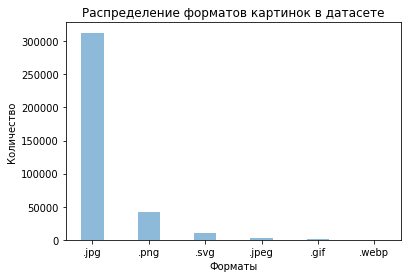

In [16]:
plt.bar(counts.keys(), counts.values(), width=0.4, alpha=0.5)
plt.xlabel('Форматы')
plt.ylabel('Количество')
plt.title('Распределение форматов картинок в датасете')
plt.show()

Посмотрим, на каких доменных языках встречаются статьи

Всего страниц языков:

In [17]:
data.language.nunique()

107

In [18]:
data.language.value_counts()

language
en     54029
de     33512
fr     25585
es     17549
ru     15182
       ...  
cv       164
xmf      159
ia       158
si       155
ckb      126
Name: count, Length: 107, dtype: int64

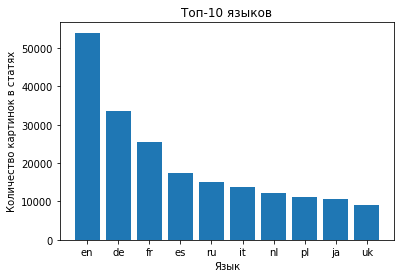

In [19]:
CountStatus = data.language.value_counts().reset_index()
CountStatus.columns = ['language', 'amount']
plt.bar(CountStatus['language'][:10], CountStatus['amount'][:10])
plt.xlabel('Язык')
plt.ylabel('Количество картинок в статях')
plt.title('Топ-10 языков')
plt.show()

Больше всего записей на en.wikipedia.

Предобработка данных

Удалим строки, где столбец caption_attribution_description пустой

In [20]:
df = data.copy()

In [21]:
df = df.dropna(subset=['caption_attribution_description'])

Везде, где возможно, выделим англиское описание картинки.

In [22]:
#list_ = df['caption_attribution_description'][2].split(':')

In [23]:
def extract_text_after_language(text):
    if 'English:' in text: 
        try: 
            list_ = text.split(':')
            english_text = ' '.join(list_[list_.index('English')+1:][0].split(' ')[:-1])
            return english_text
        except:
            return None
    else:
        return None
    

In [24]:
df['extracted_description'] = df['caption_attribution_description'].apply(lambda x: extract_text_after_language(x))

In [25]:
df.shape

(347286, 18)

In [26]:
df = df.dropna(subset=['extracted_description'])

In [27]:
df.shape

(141095, 18)

То есть статей на en.wikipedia на английском языке было 54071, а мы выделили из описания картинок описания на английском языке. И их 141 095 записей.

Далее можно работать над задачей машинного обучения

### Заключение

Мы рассмотрели набор данных WIT, который является мультимодальным, поскольку включает в себя как изображения, так и связанные с ними текстовые данные. Он считается одним из крупнейших и наиболее разнообразных общедоступных мультимодальных многоязычных наборов данных, что делает его пригодным для широкого спектра исследовательских приложений.

Например, генерация картинки по описанию, генерация названия к картинке.